# **Week 4 -  Confidence Intervals**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

## **Exercise 3.1 Concrete items**

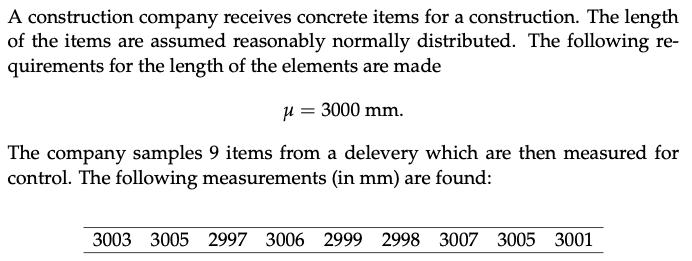

### **a) Computing stats**

Compute the following three statistics: the sample mean, the sample standard deviation and the standard error of the mean, and what are the interpretations of these statistics?

In [2]:
samples = np.array([3003, 3005, 2997, 3006, 2999, 2998, 3007, 3005, 3001])

sample_mean = np.mean(samples)
print(f"Sample Mean: {sample_mean}")
print("- This is our estimate of the true mean length of the concrete items\n")

sample_sd = np.std(samples, ddof=1)
print(f"Sample Standard Deviation: {sample_sd}")
print("- We estimate the average deviation from the mean for concrete items to be 3.7 mm.")
print("- So most concrete items will be within the range of approximately ±7.4 mm of the mean\n")

sample_sem = sample_sd / np.sqrt(len(samples))
print(f"Standard Error of the Mean: {sample_sem}")
print("- The sample mean is on average 1.24 (mm) away from the TRUE population mean")
print("- The error we will make on average in using the sample mean for estimating the population mean is 1.24")

Sample Mean: 3002.3333333333335
- This is our estimate of the true mean length of the concrete items

Sample Standard Deviation: 3.708099243547832
- We estimate the average deviation from the mean for concrete items to be 3.7 mm.
- So most concrete items will be within the range of approximately ±7.4 mm of the mean

Standard Error of the Mean: 1.2360330811826106
- The sample mean is on average 1.24 (mm) away from the TRUE population mean
- The error we will make on average in using the sample mean for estimating the population mean is 1.24


### **b) 1 cm away**

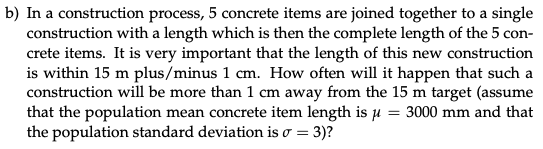

First, we need to create a random variable that is the sum of the 5 concrete items, 
$Y$:

$$Y = X_1 + X_2 + X_3 + X_4 + X_5$$

We use:

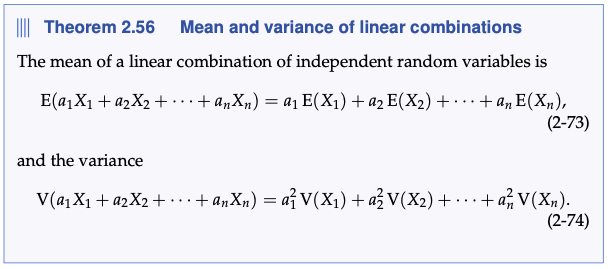

\begin{gathered}
\mathrm{E}(Y)=\sum_{i=1}^5 \mathrm{E}\left(X_i\right)=\sum_{i=1}^5 3000=5 \cdot 3000=15000 \\
\mathrm{~V}(Y)=\sum_{i=1}^5 \mathrm{~V}\left(X_i\right)=\sum_{i=1}^5 3^2=5 \cdot 9=45
\end{gathered}

Now, Y is:
$$Y \sim \mathcal{N}(15000, 45)$$

We need to find the probability:
$$P(|Y-15000|>10)$$

- Remember that 15 m = 15000 mm and 1 cm = 10 mm.
- We take the absolute value because we need to examine both sides.
- We subtract 15 m because we are examining the length beyond 15 m.

Because it is symmetric, we can multiply by 2 and remove the absolute value:

$$P(|Y-15000|>10) = 2\cdot P(Y-15000>10) = 2 \cdot P(Y>15010) = 2\cdot(1 - P(Y<15010)) $$

In [3]:
exp_y = 5 * 3000  # 15000
var_y = 5 * 3**2  # 45

# the probability can be found:
prob = 2 * (1 - stats.norm.cdf(15010, loc=exp_y, scale=np.sqrt(var_y)))
print(f"P(abs(Y-15000)>10): {prob}")

P(abs(Y-15000)>10): 0.1360371281141437


So, approximately 13.6% of the times, the construction will be more than 1 cm away from 15 m.

We can visualize this probability:

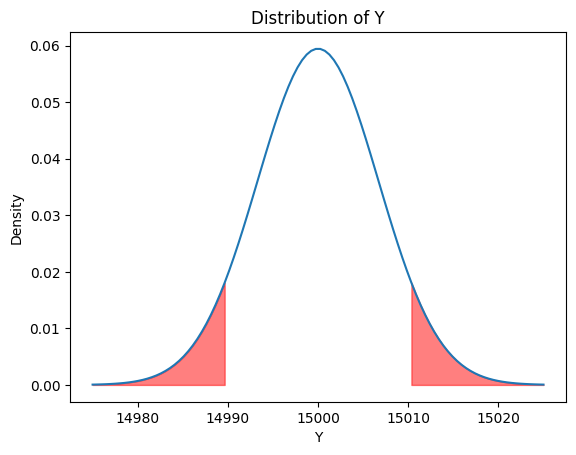

In [4]:
x = np.linspace(14975, 15025, 100)
y = stats.norm.pdf(x, loc=exp_y, scale=np.sqrt(var_y))

plt.plot(x, y)
plt.fill_between(x, y, where=(x>15010), color="red", alpha=0.5)
plt.fill_between(x, y, where=(x<14990), color="red", alpha=0.5)
plt.title("Distribution of Y")
plt.xlabel("Y")
plt.ylabel("Density")
plt.show()

P(abs(Y-15000)>10): 0.1352


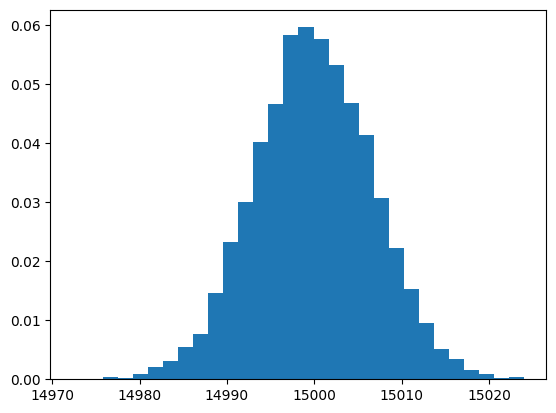

In [5]:
#simulation
samples_Y = stats.norm.rvs(loc=15000, scale=np.sqrt(var_y), size=10000)

prob = np.mean(np.abs(samples_Y - 15000) > 10)
print(f"P(abs(Y-15000)>10): {prob}")

plt.hist(samples_Y, bins=30, density=True)
plt.show()

### **c) Find the 95% confidence interval for the mean μ**

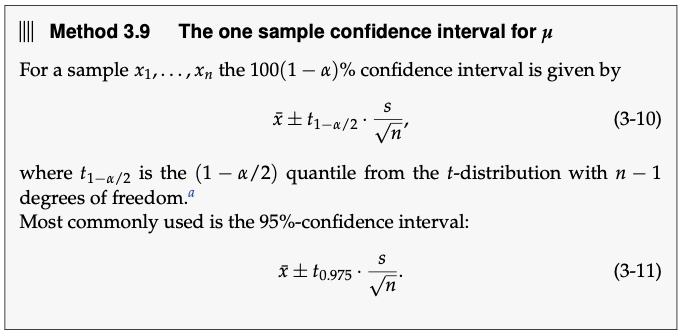

In [6]:
# Method 3.9: We need to find the t_975 quantile with df=n-1=9-1=8 degrees of freedom.
n = len(samples)
alpha = 0.05
t_975 = stats.t.ppf(1 - alpha / 2, df=n - 1)
print(f"t_975: {t_975}")

t_975: 2.3060041350333704


In [7]:
sample_mean = np.mean(samples)
sample_sd = np.std(samples, ddof=1)
confidence_interval = sample_mean + np.array([-1, 1]) * t_975 * sample_sd / np.sqrt(n)
print(f"95% Confidence Interval: {confidence_interval}")

95% Confidence Interval: [2999.48303594 3005.18363073]


In [8]:
# Confidence interval directly using stats
(CI_low,CI_high) = stats.ttest_1samp(samples, popmean=0).confidence_interval()
print(f"95% CI: {CI_low,CI_high}")

95% CI: (2999.4830359370885, 3005.1836307295785)


### **d) Find the 99% confidence interval for μ. Compare with the 95% one from above and explain why it is smaller/larger!**

In [9]:
(CI_low,CI_high) = stats.ttest_1samp(samples, popmean=0).confidence_interval(confidence_level=0.99)
print(f"99% CI: {CI_low,CI_high}")

99% CI: (2998.1859635916244, 3006.4807030750426)


The interval is wider because we want to be even more sure that the true mean lies within the interval.

### **e) Find the 95% confidence intervals for the variance $σ^2$ and the standard deviation $σ$**

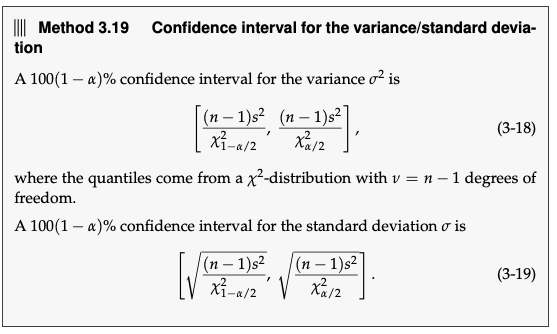

In [10]:
alpha = 0.05
n = len(samples)
sample_variance = np.var(samples, ddof=1)

# Confidence interval for variance
var_conf = [
    (n - 1) * sample_variance / stats.chi2.ppf(1 - alpha / 2, df=n - 1),
    (n - 1) * sample_variance / stats.chi2.ppf(alpha / 2, df=n - 1)
]
print(f"95% Confidence Interval for Variance: {var_conf}\n")

# Confidence interval for standard deviation
std_conf = np.sqrt(var_conf)
print(f"95% Confidence Interval for Standard Deviation: {std_conf}")

95% Confidence Interval for Variance: [6.273330323178413, 50.464948544055225]

95% Confidence Interval for Standard Deviation: [2.50466172 7.10386856]


We can create a custom function to calculate the CI for the variance for future use:

In [11]:
def var_ci(data, conf_level=0.95):
    n = len(data)
    alpha = 1 - conf_level
    sample_variance = np.var(data, ddof=1)
    lower_bound = (n - 1) * sample_variance / stats.chi2.ppf(1 - alpha / 2, df=n - 1)
    upper_bound = (n - 1) * sample_variance / stats.chi2.ppf(alpha / 2, df=n - 1)
    return lower_bound, upper_bound

var_conf_custom = var_ci(samples, conf_level=0.95)
print(f"95% Confidence Interval for Variance (custom function): {var_conf_custom}\n")
print(f"95% Confidence Interval for Standard Deviation (custom function): {np.sqrt(var_conf_custom)}")

95% Confidence Interval for Variance (custom function): (6.273330323178413, 50.46494854405522)

95% Confidence Interval for Standard Deviation (custom function): [2.50466172 7.10386856]


### **f) Find the 99% confidence intervals for the variance $σ^2$ and the standard deviation $σ$**

In [12]:
# we use the custom function to calculate the 99% confidence interval

var_conf_custom = var_ci(samples, conf_level=0.99)
print(f"95% Confidence Interval for Variance: {var_conf_custom}\n")
print(f"95% Confidence Interval for Standard Deviation: {np.sqrt(var_conf_custom)}")

95% Confidence Interval for Variance: (5.010258506419083, 81.82009016607276)

95% Confidence Interval for Standard Deviation: [2.23836067 9.04544582]


## **Exercise 3.2 Aluminum profile**

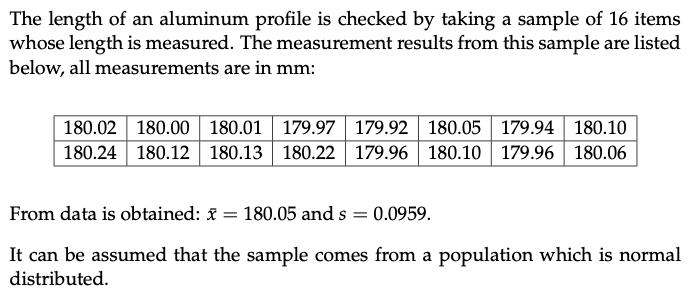

### **a) A 90%-confidence interval for μ becomes?**

In [13]:
samples = np.array([180.02, 180.00, 180.01, 179.97, 179.92, 
                    180.05, 179.94,180.10,180.24, 180.12,
                    180.13, 180.22, 179.96, 180.10, 179.96, 180.06])


# Confidence interval directly
(CI_low,CI_high) = stats.ttest_1samp(samples, popmean=0).confidence_interval(confidence_level=0.90)
print(f"90% CI: {CI_low,CI_high}")

90% CI: (180.0079633292111, 180.09203667078893)


### **b) A 99%-confidence interval for σ becomes?**

In [14]:
var_conf_custom = var_ci(samples, conf_level=0.99)
print(f"95% Confidence Interval for Variance: {var_conf_custom}\n")
print(f"95% Confidence Interval for Standard Deviation: {np.sqrt(var_conf_custom)}")

95% Confidence Interval for Variance: (0.004207147678296528, 0.02999403006827903)

95% Confidence Interval for Standard Deviation: [0.06486253 0.17318785]
